# Simon's Algorithm and its Qiskit Implementation

Simon's algorithm was the first quantum algorithm to show an exponential speed-up versus the best classical algorithm in solving a specific problem. This inspired the quantum algorithm for the discrete Fourier transform, also known as quantum Fourier transform, which is used in the most famous quantum algorithm: Shor's factoring algorithm.

Simon's algorithm solves the following problem: given a function $f: \{0,1\}^n \rightarrow \{0,1\}^n $ which takes an $n$ bit string as input and outputs another $n$-bit string and has some secret structure $s\in\{0,1\}^n$ and $s\neq 0^{\otimes n}$ such that given two different inputs $x$ and $y$, $f(x) = f(y)$ if and only if $y = x + s \, \text{mod 2}$, what is $s$?

Classically, if the algorithms picks inputs at random it will learn when $f(x_i) = f(x_j)$ so that $s=x_i \oplus x_j$ (where $\oplus$ stands for "bit-wise addition modulo 2"). Each pair determines a bit of $s$, therefore we need to find $n$ pairs to discover the value of $s$. It can be shown that $\approx 2^{\frac{n}{2}}$ calls of $f$ are necessary to find $s$ with a classical algorithm.

The quantum algorithm allows to find $s$ in $\approx n$ calls to the function $f$. Due to the periodicity in the problem, it serves as a natural precursor to Shor's algorithm. 

## Quantum Circuit for Simon's Algorithm

The quantum circuit that implements Simon's algorithm is shown below.

<img src="images/simon1.jpeg"  width="300">

Where $\text{Q}_f$ acts on two quantum registers as:
$$ \lvert x \rangle \lvert 0 \rangle \rightarrow \lvert x \rangle \lvert f(x) \rangle $$

The algorithm involves the following steps.
<ol>
   <li> Two $n$-qubit input registers are initialized to the zero state 
    $$\lvert \psi_1 \rangle = \lvert 0 \rangle^{\otimes n} \lvert 0 \rangle^{\otimes n} $$ </li>
    
   <li> Apply Hadamard on the first register
    $$\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle\lvert 0 \rangle^{\otimes n}  $$ 
   </li>
    
   <li> We make a query $\text{Q}_f$, 
    $$ \lvert \psi_3 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle \lvert f(x) \rangle  $$ 
   </li>
    
   <li> We measure the second register. A certain value of $f(x)$ will be observed. Because of the setting of the problem, the observed value $f(x)$ could correspond to two possible inputs: $x$ and $y = x \oplus s $. Therefore the first register becomes
    $$\lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert x \rangle + \lvert y \rangle \right)$$
   where we omitted the second register since it has been measured. 
   </li>
    
   <li> Apply Hadamard on the first register    
    $$ \lvert \psi_5 \rangle = \frac{1}{\sqrt{2^{n+1}}} \sum_{z \in \{0,1\}^{n} } \left[  (-1)^{x \cdot z} + (-1)^{y \cdot z} \right]  \lvert z \rangle  $$
    
   </li>
    
   <li> Measuring the first register will give an output if:
    $$ (-1)^{x \cdot z} = (-1)^{y \cdot z} $$
   Which means:
    $$ x \cdot z = y \cdot z \\
     x \cdot z = \left( x \oplus s \right) \cdot z \\
     x \cdot z = x \cdot z \oplus s \cdot z \\
     s \cdot z = 0 \text{ (mod 2)} $$
      
   A string $z$ whose inner product with $s$ will be measured. Thus, repeating the algorithm $\approx n$ times, one will be able to obtain $n$ different values of $z$ and the following system of equation can be written 
    $$ \begin{cases} s \cdot z_1 = 0 \\ s \cdot z_2 = 0 \\ ... \\ s \cdot z_n = 0 \end{cases}$$
   From which $s$ can be determined, for example by Gaussian elimination.
    </li>
</ol>

So, in this particular problem the quantum algorithm performs exponentially fewer steps than the classical one. Once again, it might be difficult to envision an application of this algorithm (although it inspired the most famous algorithm created by Shor) but it represents the first proof that there can be an exponential speed-up in solving a specific problem by using a quantum computer rather than a classical one.

## Example

Let's see the example of Simon's algorithm for 2 qubits. We take the secret string $s=11$, so that $f(x) = f(y)$ if $y = x \oplus s$. The state of the qubit register evolves in the following way:

<img src="images/simon_ex2.jpeg"  width="300">

<ol>
    <li> Two $2$-qubit input registers are initialized to the zero state 
    $$\lvert \psi_1 \rangle = \lvert 0 0 \rangle_1 \lvert 0 0 \rangle_2 $$ </li>
    
   <li> Apply Hadamard on the first register
    $$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1 + \lvert 0 1 \rangle_1 + \lvert 1 0 \rangle_1 + \lvert 1 1 \rangle_1 \right) \lvert 0 0 \rangle_2 $$ </li>
    
   <li> For the string $s=11$, the query function can be implemented as $\text{Q}_f = CX_{13}CX_{14}CX_{23}CX_{24}$, 
    $$ \lvert \psi_3 \rangle = \frac{1}{2} \left(\\
            \lvert 0 0 \rangle_1  \lvert 0\oplus 0 \oplus 0, 0 \oplus 0 \oplus 0 \rangle_2 + \\
            \lvert 0 1 \rangle_1 \lvert 0\oplus 0 \oplus 1, 0 \oplus 0 \oplus 1 \rangle_2 + \\
            \lvert 1 0 \rangle_1 \lvert 0\oplus 1 \oplus 0, 0 \oplus 1 \oplus 0 \rangle_2 + \\
            \lvert 1 1 \rangle_1 \lvert 0\oplus 1 \oplus 1, 0 \oplus 1 \oplus 1 \rangle_2 \\
            \right)  $$
    
   Thus
    $$ \lvert \psi_3 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1  \lvert 0 0 \rangle_2 + \lvert 0 1 \rangle_1 \lvert 1  1 \rangle_2 + \lvert 1 0 \rangle_1 \lvert  1   1  \rangle_2 + \lvert 1 1 \rangle_1 \lvert 0 0 \rangle_2 \right)  $$
    
    
   </li>
    
   <li> We measure the second register. With $50\%$ probability we will see either $\lvert  0   0  \rangle_2$ or $\lvert  1   1  \rangle_2$. For the sake of the example, let us assume that we see $\lvert  1   1  \rangle_2$. The state of the system is then
    $$ \lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert  0   1  \rangle_1 + \lvert  1   0  \rangle_1 \right)  $$
    
   where we omitted the second register since it has been measured.
    
   </li>
    
    
    
   <li> Apply Hadamard on the first register
    $$ \lvert \psi_5 \rangle = \frac{1}{2\sqrt{2}} \left[ \left( \lvert 0 \rangle + \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right) + \left( \lvert 0 \rangle - \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle + \lvert 1 \rangle \right)  \right] \\
    =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle - \lvert 0 1 \rangle + \lvert 1 0 \rangle - \lvert 1 1 \rangle   + \lvert 0 0 \rangle + \lvert 0 1 \rangle - \lvert 1 0 \rangle - \lvert 1 1 \rangle \right] \\
    = \frac{1}{\sqrt{2}} \left( \lvert 0 0 \rangle - \lvert 1 1 \rangle \right)$$
    
   </li>
    
   <li> Measuring the first register will give either $\lvert 0, 0 \rangle$ or $\lvert 1, 1 \rangle$ with equal probability. If we see $\lvert 1, 1 \rangle$, then:   
    $$ s \cdot 11 = 0 $$
    
   This is one equation, but $s$ has two variables. Therefore, we need to repeat the algorithm other times to have enough equations that will allow us to determine $s$.
      
   </li>
</ol>

## Qiskit Implementation

We now implement Simon's algorithm with Qiskit by first preparing the environment.

In [1]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

We first set the hidden binary number $s$ to be found by Simon's algorithm. The hidden binary number $s$ determines the circuit for the quantum oracle. In this case, we are using $n = 2$. For the interested reader, a description of the Oracle for three qubits ($s = 110$) can be found in Ref. [1].

In [2]:
s = '11'

In [3]:
# Creating registers
# qubits for querying the oracle and finding the hidden period s
qr = QuantumRegister(2*len(str(s)))
# classical registers for recording the measurement on qr
cr = ClassicalRegister(2*len(str(s)))

simonCircuit = QuantumCircuit(qr, cr)
barriers = True

# Apply Hadamard gates before querying the oracle
for i in range(len(str(s))):
    simonCircuit.h(qr[i])    
    
# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Apply the inner-product oracle 
if s == '11':
## 2-qubit oracle for s = 11
    simonCircuit.cx(qr[0], qr[len(str(s)) + 0])
    simonCircuit.cx(qr[0], qr[len(str(s)) + 1])
    simonCircuit.cx(qr[1], qr[len(str(s)) + 0])
    simonCircuit.cx(qr[1], qr[len(str(s)) + 1])  
elif s == '110':
## 3-qubit oracle for s = 110
    simonCircuit.cx(qr[2], qr[4])  
    simonCircuit.x(qr[3])  
    simonCircuit.cx(qr[2], qr[3])  
    simonCircuit.ccx(qr[0], qr[1], qr[3])  
    simonCircuit.x(qr[0])  
    simonCircuit.x(qr[1])  
    simonCircuit.ccx(qr[0], qr[1], qr[3])  
    simonCircuit.x(qr[0])  
    simonCircuit.x(qr[1])  
    simonCircuit.x(qr[3])

# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Measure ancilla qubits
for i in range(len(str(s)), 2*len(str(s))):
    simonCircuit.measure(qr[i], cr[i])

# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Apply Hadamard gates to the input register
for i in range(len(str(s))):
    simonCircuit.h(qr[i])

# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Measure input register
for i in range(len(str(s))):
    simonCircuit.measure(qr[i], cr[i])

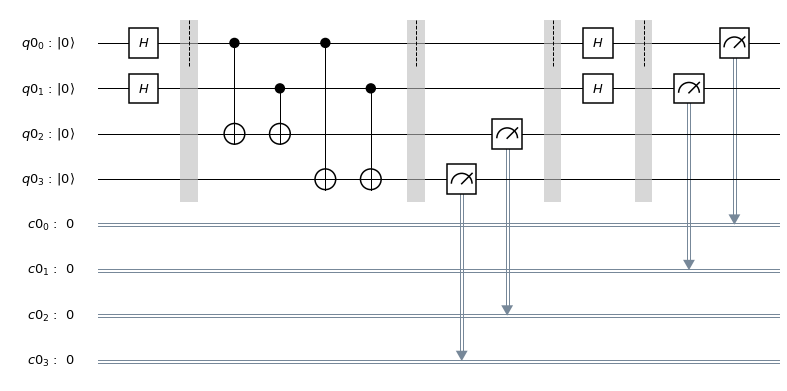

In [4]:
simonCircuit.draw(output='mpl')

## Experiment with Simulators

We can run the above circuit on the simulator. 

{'1100': 256, '0011': 261, '1111': 253, '0000': 254}
{'00': 510, '11': 514}


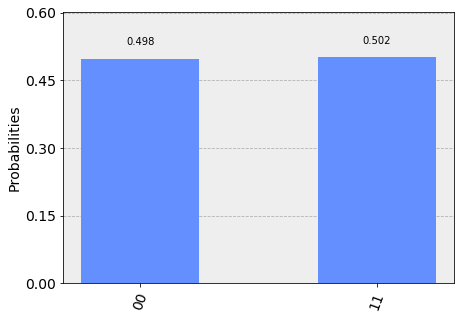

In [5]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(simonCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
print(answer)

# categorize measurements by input register values
answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[len(str(s)):]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult] 

# plot the categorized results
print( answer_plot )
plot_histogram(answer_plot)

In [6]:
def sdotz(a, b):
    accum = 0
    for i in range(len(a)):
        accum += int(a[i]) * int(b[i])
    return (accum % 2)

print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    z = z_rev[::-1]
    print( '{}, {}, {}.{}={}'.format(s, z, s,z,sdotz(s,z)) )

s, z, s.z (mod 2)
11, 00, 11.00=0
11, 11, 11.11=0


Using these results, we can recover the value of $s$.

## Experiment with Real Devices

We can run the circuit on the real device as shown below.

In [7]:
# Load our saved IBMQ accounts and get the least busy backend device that we are allowed to use
IBMQ.load_accounts()
IBMQ.backends()
backend_lb = least_busy(IBMQ.backends(simulator=False))
print("Least busy backend: ", backend_lb)

Least busy backend:  ibmq_20_tokyo


In [8]:
# run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

backend = backend_lb
shots = 1024
job_exp = execute(simonCircuit, backend=backend, shots=shots)

job_monitor(job_exp, interval = 2)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [9]:
# get the results from the computation
results = job_exp.result()
answer = results.get_counts(simonCircuit)
print(answer)

{'1100': 189, '0001': 43, '1011': 24, '0000': 212, '1111': 133, '0101': 8, '0110': 13, '1001': 15, '0011': 190, '0010': 28, '1010': 18, '0100': 20, '1110': 29, '1101': 22, '1000': 48, '0111': 32}


{'00': 469, '01': 88, '11': 379, '10': 88}


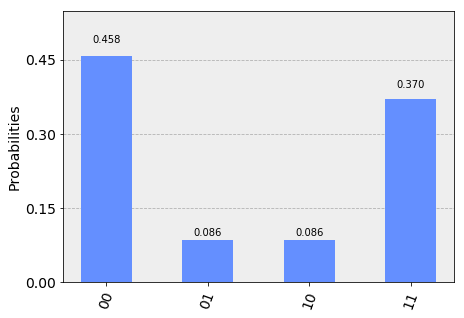

In [10]:
# categorize measurements by input register values
answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[len(str(s)):]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult] 

# plot the categorized results
print( answer_plot )
plot_histogram(answer_plot)

In [11]:
# calculate the dot product of the most significant results
print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    if answer_plot[z_rev] >= 0.1*shots:
        z = z_rev[::-1]
        print( '{}, {}, {}.{}={}'.format(s, z, s,z,sdotz(s,z)) )

s, z, s.z (mod 2)
11, 00, 11.00=0
11, 11, 11.11=0


As we can see, the most sigificant results are those for which $s.z = 0$ (mod 2). Using a classical computer, we can then recover the value of $s$ by solving the linear system of equations. For the $n=2$ case, the solution is trivial and $s = 11$.

## References

[1] Adina BĂRÎLĂ, Quantum Computing - A new Implementation of Simon Algorithm for 3-Dimensional Registers. Journal of Applied Computer Science & Mathematics 19 (2015).

# Another Example

In [1]:
'''
    Simon's algorithm

    We know that an oracle function f which has period a:

    f : {0, 1}^n -> {0, 1}^n

    ∃!a != 0: ∀x f(x) = f(y) => y = x ⊕ a

    Task: Find a.

'''
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

qr = QuantumRegister(4)  # Initialize qubits
cr = ClassicalRegister(4)  # Initialize bits for record measurements
circuit = QuantumCircuit(qr, cr)

# First two qubits form a register to store x, last two qubits from a register to store f(x)
# Apply Hadamard to first two
circuit.h(qr[0])
circuit.h(qr[1])

circuit.barrier()

# Oracle function, a = 11
circuit.cx(qr[0], qr[2])
circuit.cx(qr[1], qr[2])
circuit.cx(qr[0], qr[3])
circuit.cx(qr[1], qr[3])

circuit.barrier()

# Measure last two qubits
circuit.measure(qr[2], cr[2])
circuit.measure(qr[3], cr[3])

circuit.barrier()

# Apply Hadamard to first two qubits
circuit.h(qr[0])
circuit.h(qr[1])

circuit.barrier()

circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[1])

# Run our circuit with local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

# Categorize measurements by input register values
answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[2:]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult]

print(answer_plot)


def sdotz(a, b):  # Calculate the dot product of the results
    accum = 0
    for i in range(len(a)):
        accum += int(a[i]) * int(b[i])
    return (accum % 2)


print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    z = z_rev[::-1]
    print(f'{11}, {z}, {11}.{z}={sdotz("11",z)}')
# We can recover the value of a = 11.


{'00': 545, '11': 479}
s, z, s.z (mod 2)
11, 00, 11.00=0
11, 11, 11.11=0
